<a href="https://colab.research.google.com/github/2003saurabh/deep_learning/blob/main/functional_api_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.models import Model


In [7]:
from keras.layers import *


In [8]:
x=Input(shape=(3,1))

In [10]:
hidden1=Dense(128,activation='relu')(x)
hidden2=Dense(64,activation='relu')(hidden1)

output1=Dense(1,activation='linear')(hidden1)
output2=Dense(1,activation='sigmoid')(hidden2)

model=Model(inputs=x,outputs=[output1,output2])

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 3, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 3, 128)         │            256 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 3, 64)          │          8,256 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 3, 1)           │            129 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 3, 1)           │             65 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,706 (34.01 KB)

 Trainable params: 8,706 (34.01 KB)

 Non-trainable params: 0 (0.00 B)

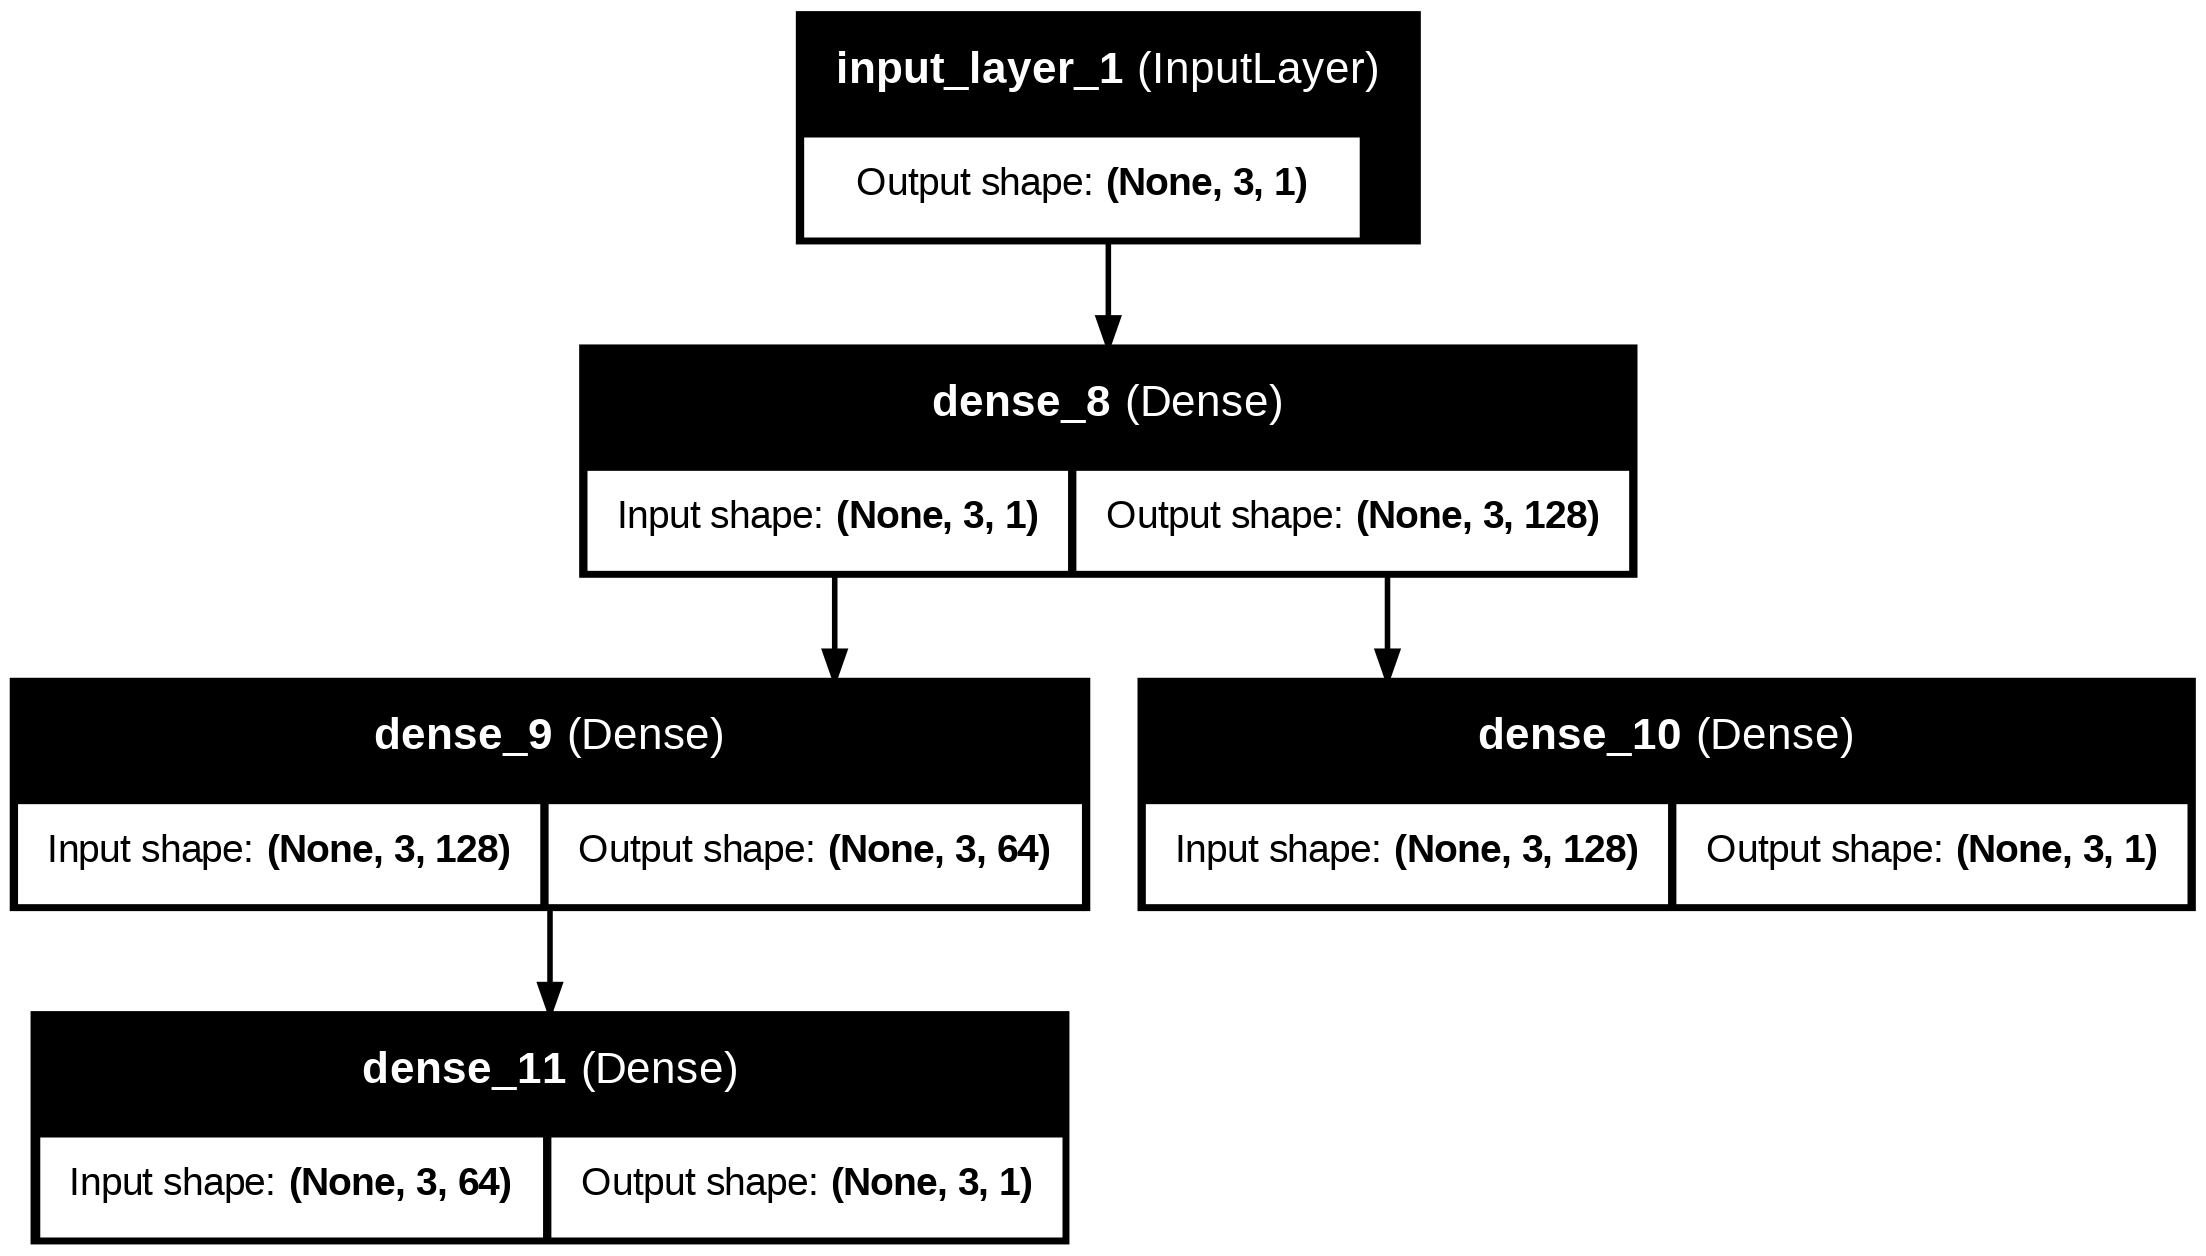

In [12]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [14]:
# deefine two sets of input
inputA=Input(shape=(32,))
inputB=Input(shape=(128,))

In [15]:
# the first branch operates on the first input

x=Dense(8,activation="relu")(inputA)
x1=Dense(4,activation='relu')(x)

In [16]:
# the second branch operates on the second input

y=Dense(64,activation="relu")(inputB)
y1=Dense(32,activation='relu')(y)
y2=Dense(4,activation='relu')(y1)


In [18]:
#combine the output of the two branch
combined=concatenate([x1,y2])

In [24]:
# apply a FC layer and then a regression prediction on the combined outputs
z=Dense(2,activation='relu')(combined)
z1=Dense(1,activation='linear')(z)

In [25]:
# our model accept the inputs of the two branches and then output the single value
model=Model(inputs=[inputA,inputB],outputs=z)

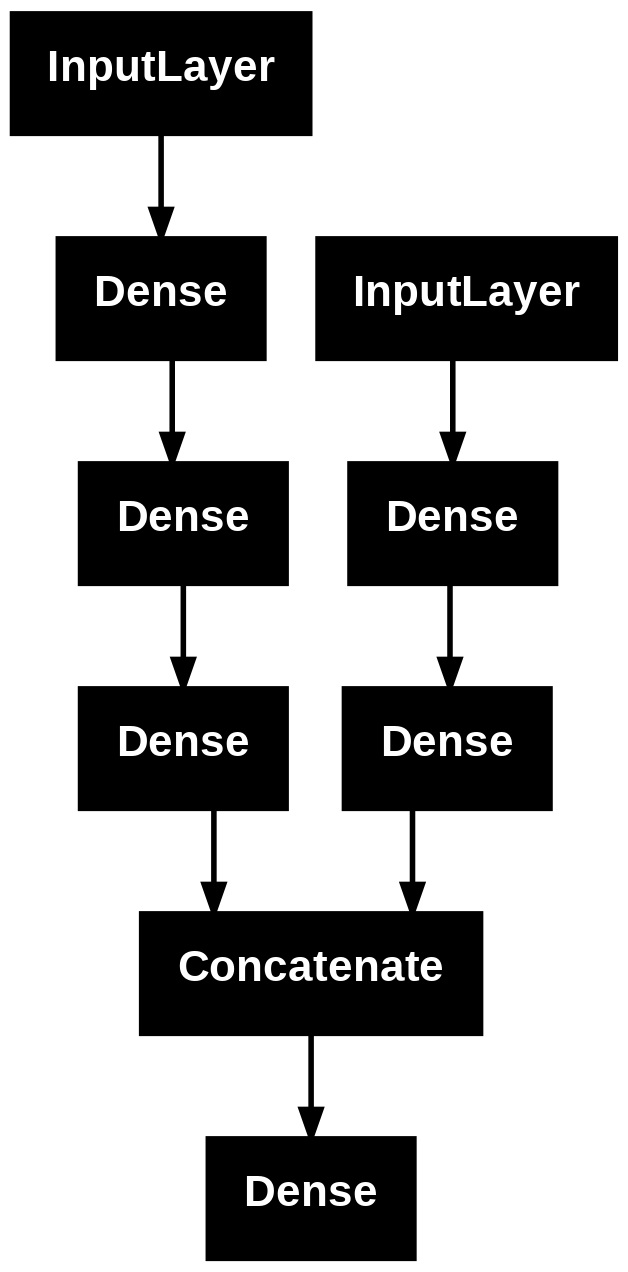

In [28]:
from keras.utils import plot_model
plot_model(model)